In [1]:
import pandas as pd
from tech_core.feature_pipeline import FeaturesPipeline
from tech_core.losses import StreamingSharpeLoss
from tech_core.nn_builder import SimplePortfolioAllocator, DeepPortfolioAllocator_1
import torch
from tqdm import tqdm
# ??? Should we make different train periods for different models?

In [2]:
path_to_data = '../data/'

split_dates = [
    pd.Timestamp("2025-01-01")
]
split_names = ['train', 'test']

fee = 1.53e-4
padding = 35
batch_size_config = {
    0: 1000,
    # 40: 4000,
    # 80: 10000
}
num_epochs = 200
adam_lr = 1e-1
log_freq = 5

In [3]:
prev_models = []

batch_size = batch_size_config[0]
pipeline = FeaturesPipeline(
    path_to_data,
    padding=padding,
    batch_size=batch_size,
    split_dates=split_dates,
    split_names=split_names
)

cmf_dim = asset_dim = num_assets = None
for common_feats, asset_feats, fut_ret, _, _ in tqdm(pipeline.iterate('train'), desc="Loading features"):
    cmf_dim = common_feats.shape[1]
    asset_dim = asset_feats.shape[2]
    num_assets = asset_feats.shape[1]
    break
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Loading features: 0it [00:00, ?it/s]


  0%|          | 0/200 [00:00<?, ?it/s]

Changing batch size to 1000 at epoch 0


  2%|▏         | 4/200 [03:23<2:44:25, 50.33s/it]

Sharpe Ratio for the epoch: -0.0133
Average Weights:



,Weight
Cash,7.515750e-01
ZION,4.041032e-07
KEY,1.918935e-07
CMA,5.283270e-08
CFG,4.342102e-08
...,...
K,2.848378e-11
STZ,2.808677e-11
SPGI,2.643094e-11
MO,2.547790e-11


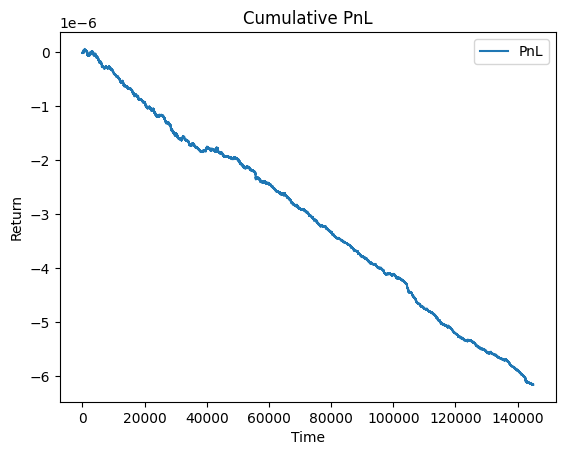

Epoch 5: Loss = 0.009288572706282139
Sharpe Ratio for the epoch: -0.0180
Average Weights:



,Weight
Cash,7.177143e-01
ZION,3.521462e-07
KEY,1.600975e-07
CMA,4.385002e-08
CFG,3.592837e-08
...,...
K,2.822261e-11
STZ,2.785486e-11
SPGI,2.580233e-11
MO,2.517087e-11


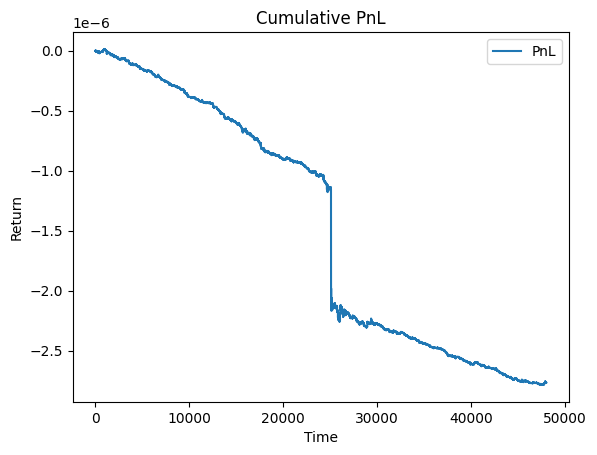

  4%|▍         | 9/200 [07:35<2:40:17, 50.35s/it]

Sharpe Ratio for the epoch: -0.0039
Average Weights:



,Weight
Cash,7.515756e-01
ZION,9.789041e-08
KEY,5.213952e-08
CMA,1.458484e-08
CFG,1.223303e-08
...,...
K,1.012595e-11
STZ,9.928338e-12
SPGI,9.253790e-12
MO,9.010209e-12


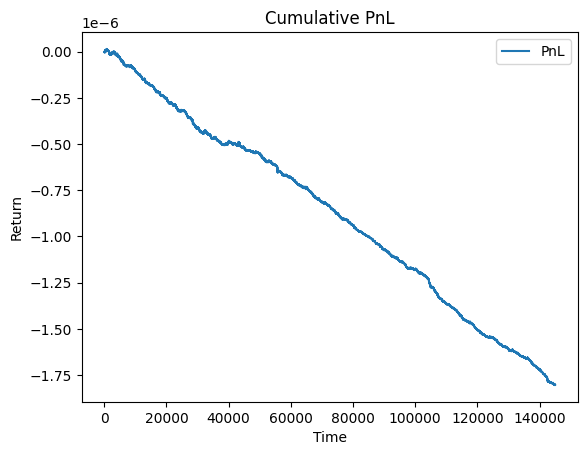

Epoch 10: Loss = 0.00302867335267365
Sharpe Ratio for the epoch: -0.0052
Average Weights:



,Weight
Cash,7.177148e-01
ZION,9.445284e-08
KEY,4.759492e-08
CMA,1.320747e-08
CFG,1.103088e-08
...,...
KO,1.074711e-11
STZ,1.057553e-11
SPGI,9.709711e-12
MO,9.560487e-12


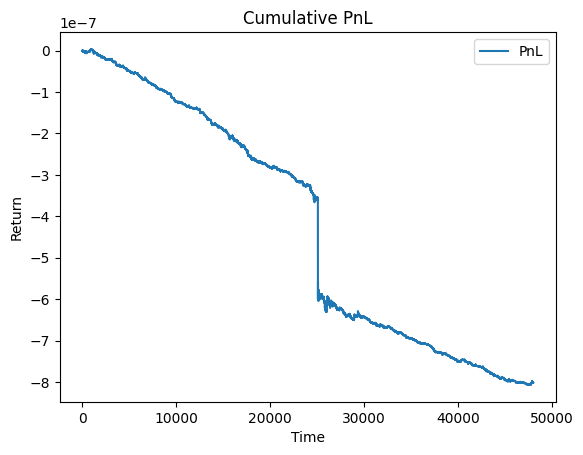

  7%|▋         | 14/200 [11:46<2:35:21, 50.12s/it]

Sharpe Ratio for the epoch: -0.0018
Average Weights:



,Weight
Cash,7.515759e-01
ZION,4.124221e-08
KEY,2.309891e-08
CMA,6.511623e-09
TFC,5.540757e-09
...,...
KO,5.261045e-12
STZ,5.152318e-12
SPGI,4.770676e-12
MO,4.677367e-12


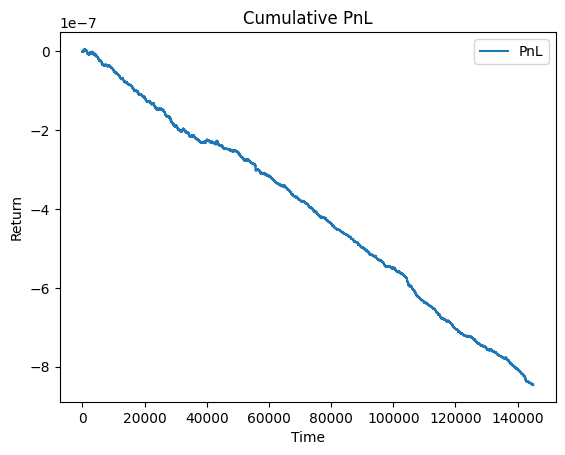

Epoch 15: Loss = 0.0014796324539929628
Sharpe Ratio for the epoch: -0.0024
Average Weights:



,Weight
Cash,7.177150e-01
ZION,4.093549e-08
KEY,2.163777e-08
CMA,6.047823e-09
TFC,5.121385e-09
...,...
KO,5.704222e-12
STZ,5.609288e-12
SPGI,5.117537e-12
MO,5.072531e-12


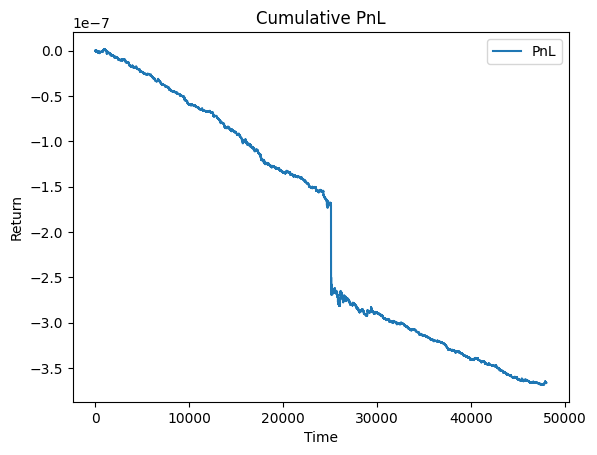

 10%|▉         | 19/200 [15:58<2:31:45, 50.31s/it]

Sharpe Ratio for the epoch: -0.0010
Average Weights:



,Weight
Cash,7.515759e-01
ZION,2.122988e-08
KEY,1.226162e-08
CMA,3.474500e-09
TFC,2.995374e-09
...,...
KO,3.148865e-12
STZ,3.081889e-12
SPGI,2.838185e-12
MO,2.798558e-12


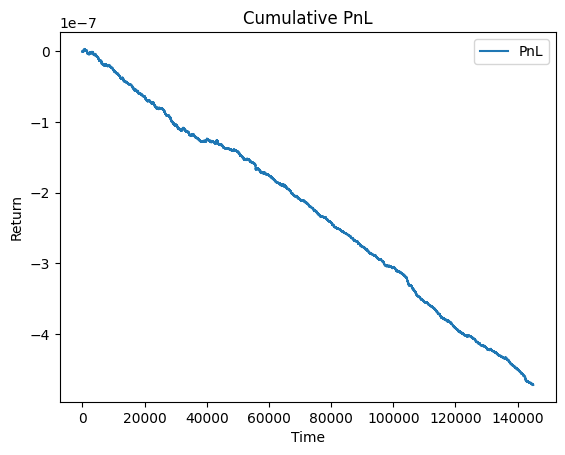

Epoch 20: Loss = 0.0008442961261607707
Sharpe Ratio for the epoch: -0.0013
Average Weights:



,Weight
Cash,7.177150e-01
ZION,2.133411e-08
KEY,1.161803e-08
CMA,3.263754e-09
TFC,2.798841e-09
...,...
KO,3.449762e-12
STZ,3.390343e-12
SPGI,3.076860e-12
MO,3.066766e-12


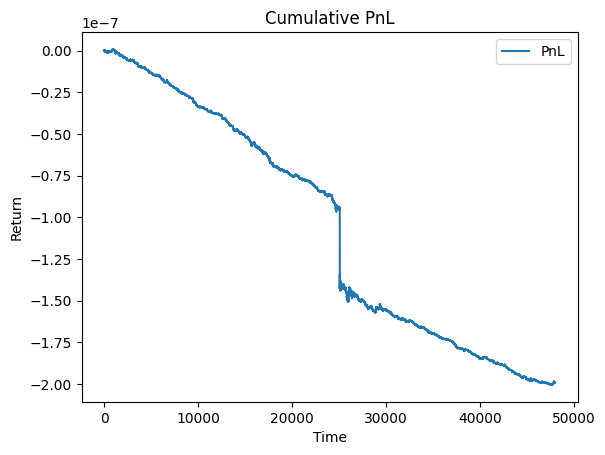

 12%|█▏        | 24/200 [20:10<2:27:16, 50.21s/it]

Sharpe Ratio for the epoch: -0.0006
Average Weights:



,Weight
Cash,7.515759e-01
ZION,1.208071e-08
KEY,7.129884e-09
CMA,2.028199e-09
TFC,1.766182e-09
...,...
KO,2.023768e-12
STZ,1.979630e-12
SPGI,1.814319e-12
MO,1.798075e-12


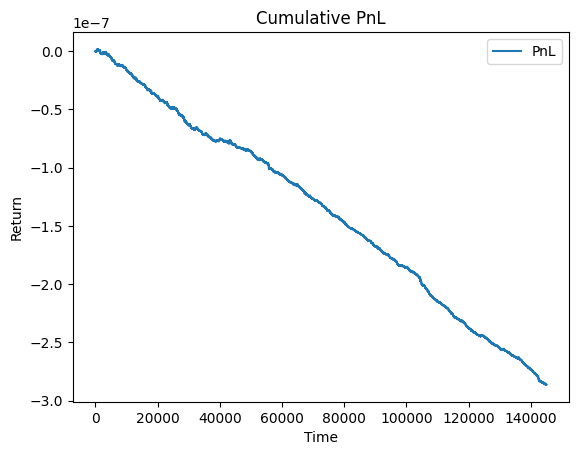

Epoch 25: Loss = 0.0005213821423240006
Sharpe Ratio for the epoch: -0.0008
Average Weights:



,Weight
Cash,7.177150e-01
ZION,1.221765e-08
KEY,6.795504e-09
CMA,1.916529e-09
TFC,1.659565e-09
...,...
KO,2.230346e-12
STZ,2.190757e-12
MO,1.982171e-12
SPGI,1.978825e-12


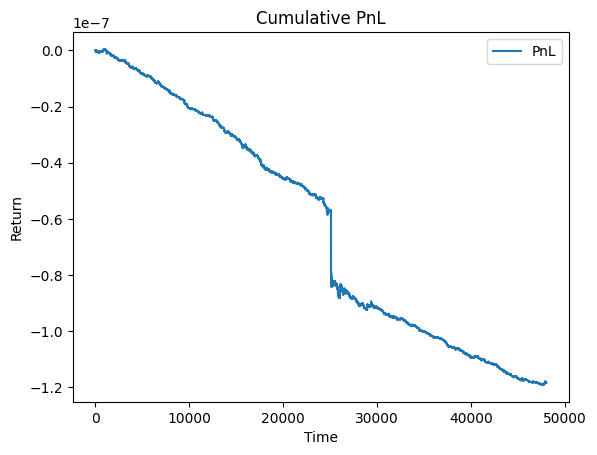

 14%|█▍        | 29/200 [24:21<2:23:37, 50.39s/it]

Sharpe Ratio for the epoch: -0.0004
Average Weights:



,Weight
Cash,7.515759e-01
ZION,7.281399e-09
KEY,4.368061e-09
CMA,1.246589e-09
TFC,1.094428e-09
...,...
KO,1.354367e-12
STZ,1.324139e-12
SPGI,1.208139e-12
MO,1.202983e-12


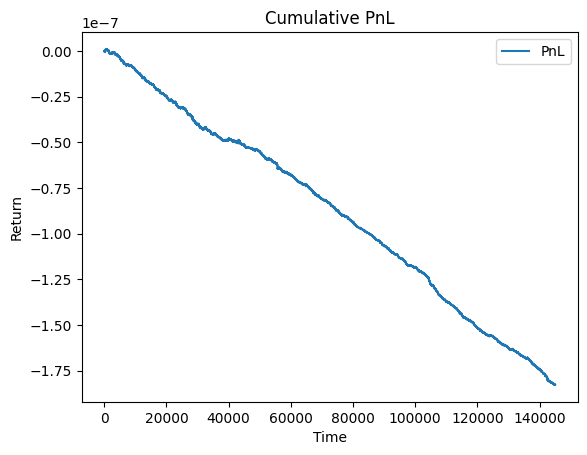

Epoch 30: Loss = 0.0003370001504663378
Sharpe Ratio for the epoch: -0.0005
Average Weights:



,Weight
Cash,7.177150e-01
ZION,7.389957e-09
KEY,4.176631e-09
CMA,1.181890e-09
TFC,1.031508e-09
...,...
KO,1.498229e-12
STZ,1.470881e-12
MO,1.331167e-12
SPGI,1.322754e-12


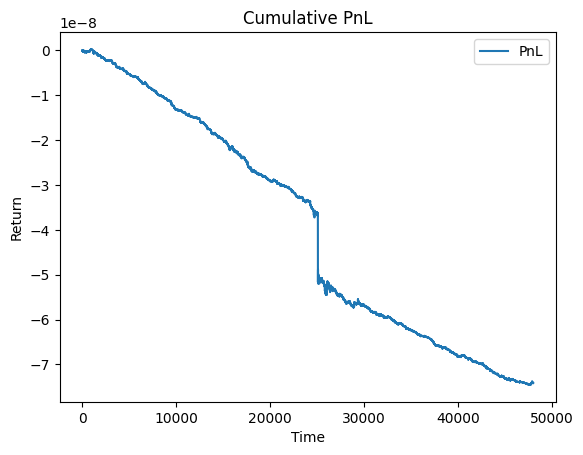

 17%|█▋        | 34/200 [28:32<2:18:45, 50.15s/it]

Sharpe Ratio for the epoch: -0.0003
Average Weights:



,Weight
Cash,7.515759e-01
ZION,4.547687e-09
KEY,2.763411e-09
CMA,7.908589e-10
TFC,6.991295e-10
...,...
KO,9.288692e-13
STZ,9.076778e-13
MO,8.248183e-13
SPGI,8.246266e-13


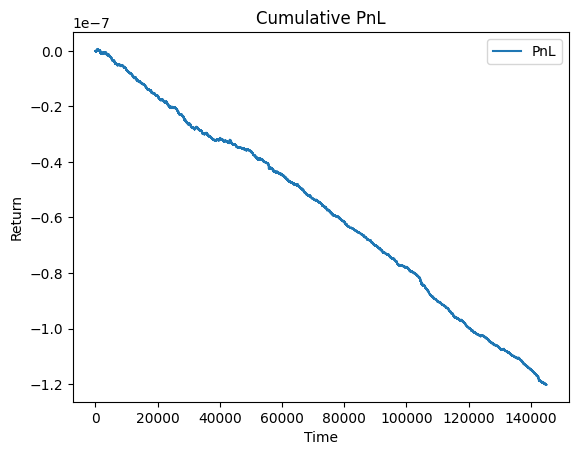

Epoch 35: Loss = 0.00022404624905902892
Sharpe Ratio for the epoch: -0.0003
Average Weights:



,Weight
Cash,7.177150e-01
ZION,4.624669e-09
KEY,2.646969e-09
CMA,7.512519e-10
TFC,6.600362e-10
...,...
FOXA,1.026076e-12
STZ,1.010848e-12
MO,9.150522e-13
SPGI,9.052260e-13


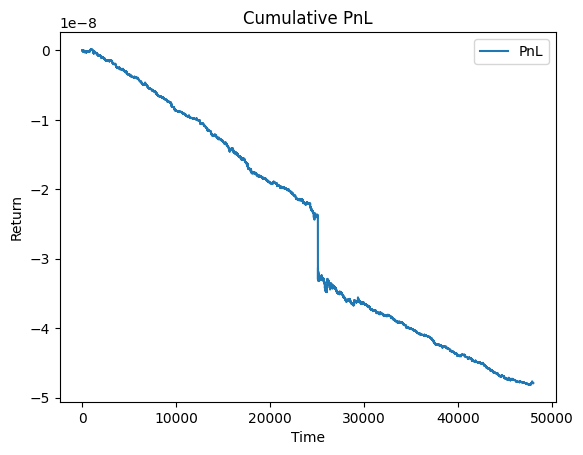

 20%|█▉        | 39/200 [32:42<2:14:14, 50.03s/it]

Sharpe Ratio for the epoch: -0.0002
Average Weights:



,Weight
Cash,7.515759e-01
ZION,2.906468e-09
KEY,1.784537e-09
CMA,5.120056e-10
TFC,4.553309e-10
...,...
KO,6.468553e-13
STZ,6.317829e-13
MO,5.742394e-13
SPGI,5.715927e-13


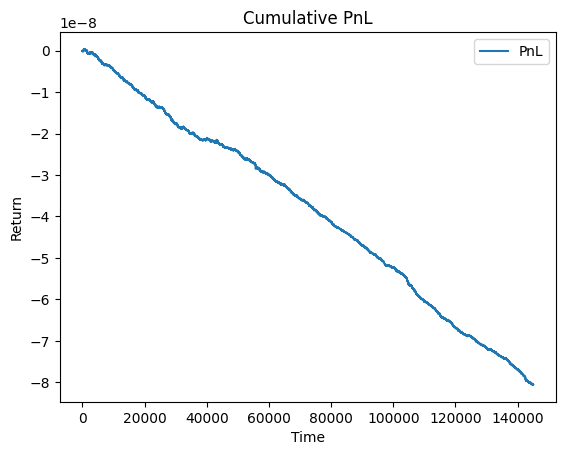

Epoch 40: Loss = 0.00015166222874540836
Sharpe Ratio for the epoch: -0.0002
Average Weights:



,Weight
Cash,7.177150e-01
ZION,2.958919e-09
KEY,1.710888e-09
CMA,4.868886e-10
TFC,4.302364e-10
...,...
WY,7.105041e-13
STZ,7.048889e-13
MO,6.382425e-13
SPGI,6.286521e-13


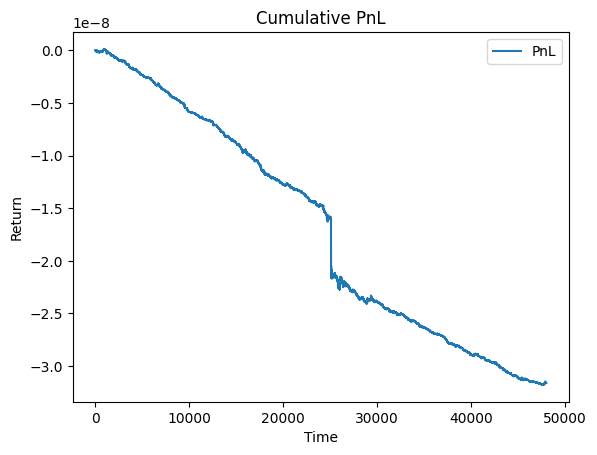

 22%|██▏       | 44/200 [36:52<2:09:41, 49.88s/it]

Sharpe Ratio for the epoch: -0.0001
Average Weights:



,Weight
Cash,7.515759e-01
ZION,1.886333e-09
KEY,1.167989e-09
CMA,3.358955e-10
TFC,3.002816e-10
...,...
KO,4.548171e-13
STZ,4.440026e-13
MO,4.036526e-13
SPGI,4.000610e-13


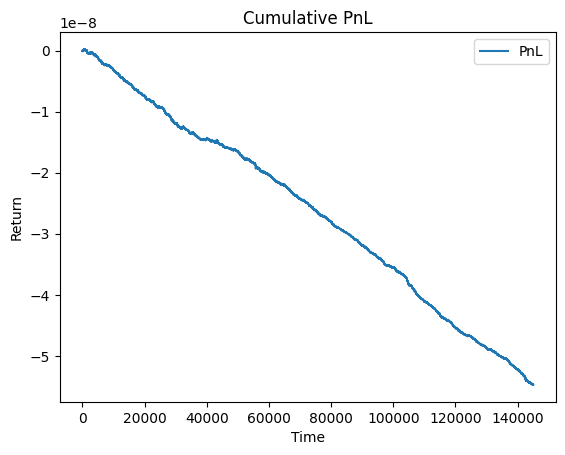

Epoch 45: Loss = 0.00010387139627709985
Sharpe Ratio for the epoch: -0.0001
Average Weights:



,Weight
Cash,7.177150e-01
ZION,1.921435e-09
KEY,1.120216e-09
CMA,3.195994e-10
TFC,2.838297e-10
...,...
STZ,4.960707e-13
WY,4.936165e-13
MO,4.492750e-13
SPGI,4.406358e-13


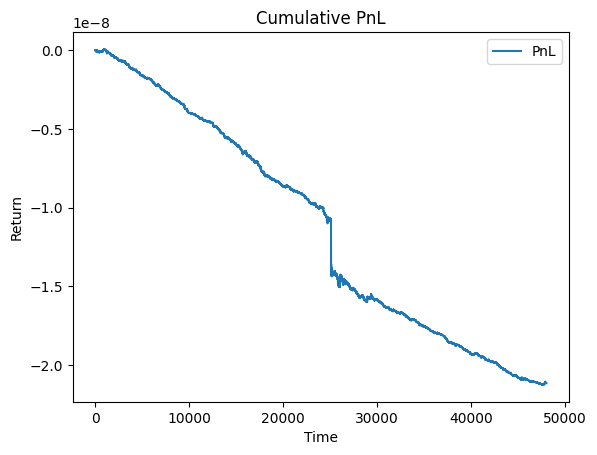

 24%|██▍       | 49/200 [41:01<2:05:11, 49.74s/it]

Sharpe Ratio for the epoch: -0.0001
Average Weights:



,Weight
Cash,7.515759e-01
ZION,1.237189e-09
KEY,7.713326e-10
CMA,2.223092e-10
TFC,1.996648e-10
...,...
FOXA,3.211394e-13
STZ,3.139217e-13
MO,2.854580e-13
SPGI,2.817095e-13


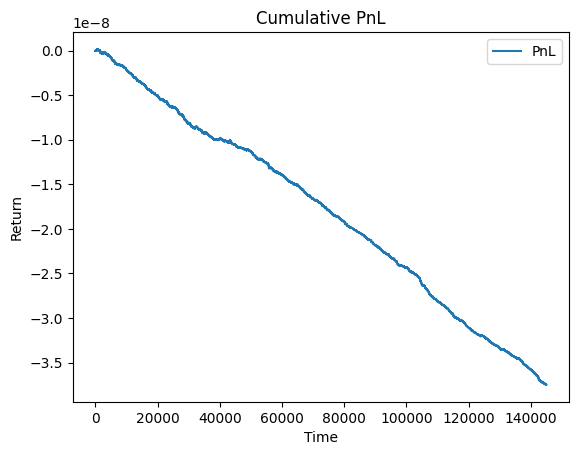

Epoch 50: Loss = 7.1688111347612e-05
Sharpe Ratio for the epoch: -0.0001
Average Weights:



,Weight
Cash,7.177150e-01
ZION,1.260457e-09
KEY,7.398089e-10
CMA,2.115711e-10
TFC,1.887276e-10
...,...
STZ,3.511177e-13
WY,3.449829e-13
MO,3.180732e-13
SPGI,3.106368e-13


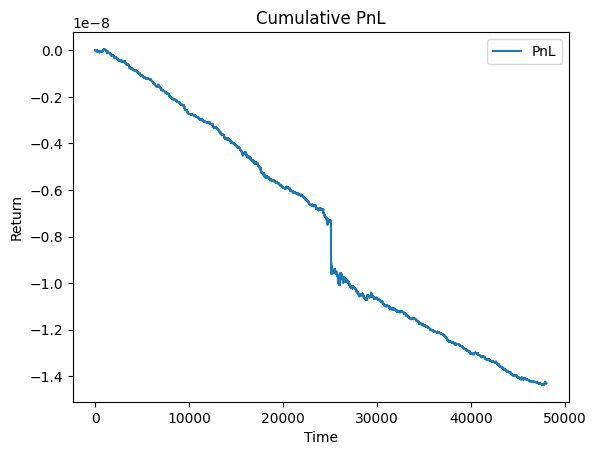

 27%|██▋       | 54/200 [45:10<2:01:12, 49.81s/it]

Sharpe Ratio for the epoch: -0.0001
Average Weights:



,Weight
Cash,7.515759e-01
ZION,8.173484e-10
KEY,5.124464e-10
CMA,1.479985e-10
TFC,1.334785e-10
...,...
WY,2.260384e-13
STZ,2.227547e-13
MO,2.026037e-13
SPGI,1.990939e-13


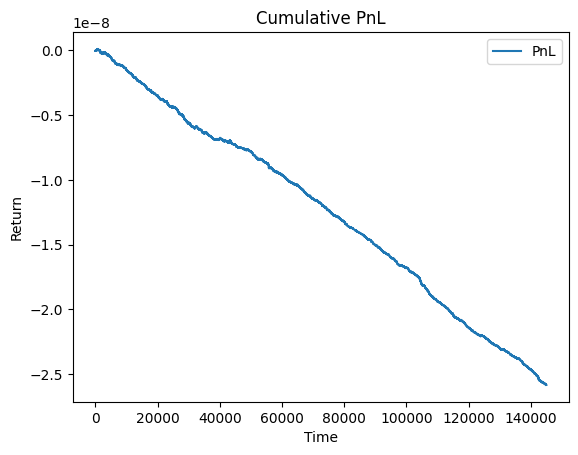

Epoch 55: Loss = 4.9727066652849317e-05
Sharpe Ratio for the epoch: -0.0001
Average Weights:



,Weight
Cash,7.177150e-01
ZION,8.327316e-10
KEY,4.914308e-10
CMA,1.408567e-10
TFC,1.261467e-10
...,...
FOXA,2.491359e-13
WY,2.419805e-13
MO,2.259682e-13
SPGI,2.197566e-13


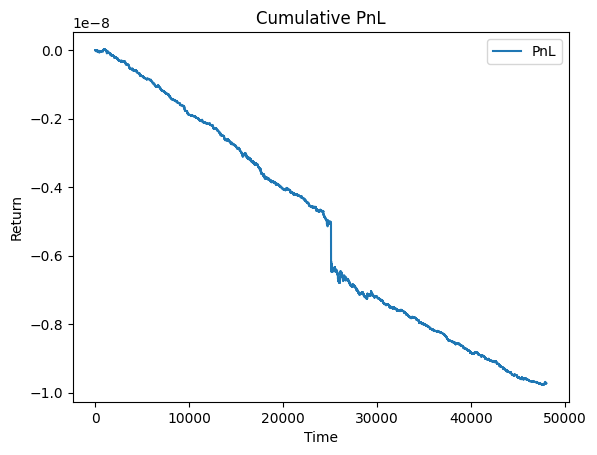

 30%|██▉       | 59/200 [49:20<1:57:37, 50.05s/it]

Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.515759e-01
ZION,5.428087e-10
KEY,3.418535e-10
CMA,9.892277e-11
TFC,8.955414e-11
...,...
WY,1.587166e-13
STZ,1.583997e-13
MO,1.441049e-13
SPGI,1.410082e-13


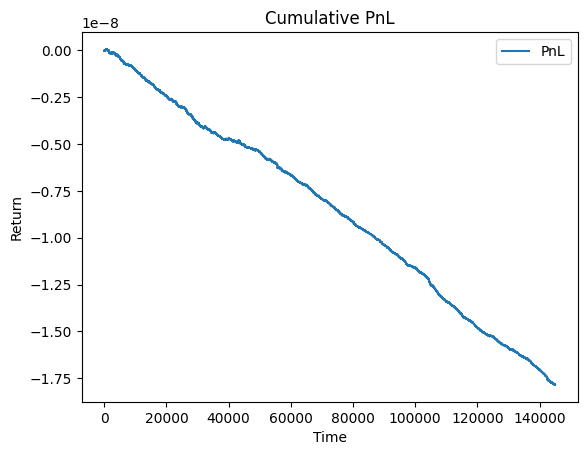

Epoch 60: Loss = 3.460982770775445e-05
Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.177150e-01
ZION,5.529576e-10
KEY,3.277407e-10
CMA,9.414158e-11
TFC,8.461046e-11
...,...
FOXA,1.766210e-13
WY,1.700962e-13
MO,1.608575e-13
SPGI,1.557791e-13


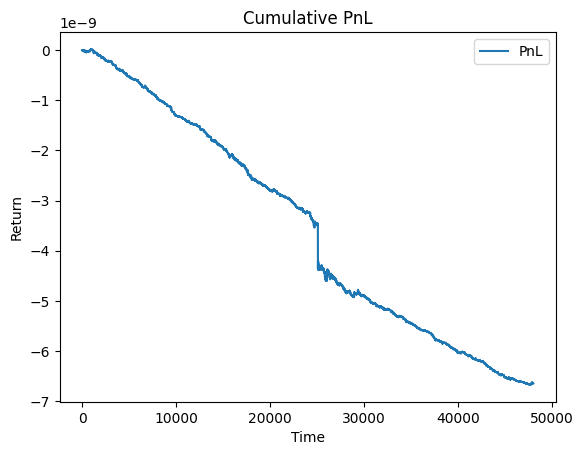

 32%|███▏      | 64/200 [53:33<1:54:04, 50.33s/it]

Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.515759e-01
ZION,3.618419e-10
KEY,2.286861e-10
CMA,6.630038e-11
TFC,6.022395e-11
...,...
STZ,1.127595e-13
WY,1.115788e-13
MO,1.026079e-13
SPGI,9.997839e-14


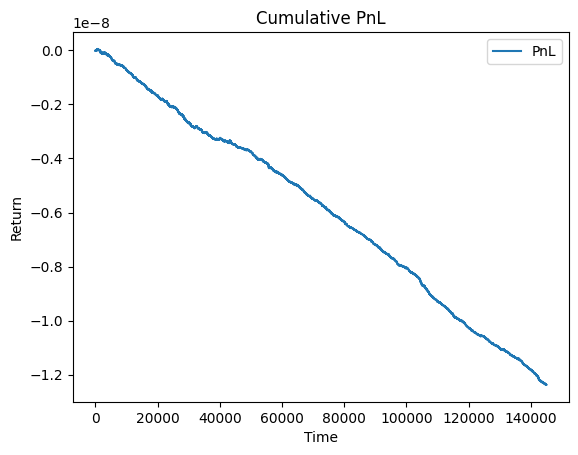

Epoch 65: Loss = 2.4142946131178178e-05
Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.177150e-01
ZION,3.685371e-10
KEY,2.191669e-10
CMA,6.308692e-11
TFC,5.687861e-11
...,...
FOXA,1.253454e-13
WY,1.197027e-13
MO,1.146255e-13
SPGI,1.105417e-13


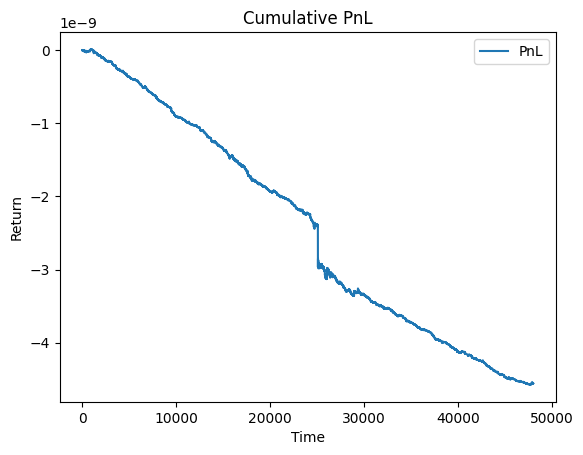

 34%|███▍      | 69/200 [57:43<1:49:08, 49.99s/it]

Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.515759e-01
ZION,2.418714e-10
KEY,1.532690e-10
CMA,4.451865e-11
TFC,4.055861e-11
...,...
STZ,8.029758e-14
WY,7.847567e-14
MO,7.308597e-14
SPGI,7.091169e-14


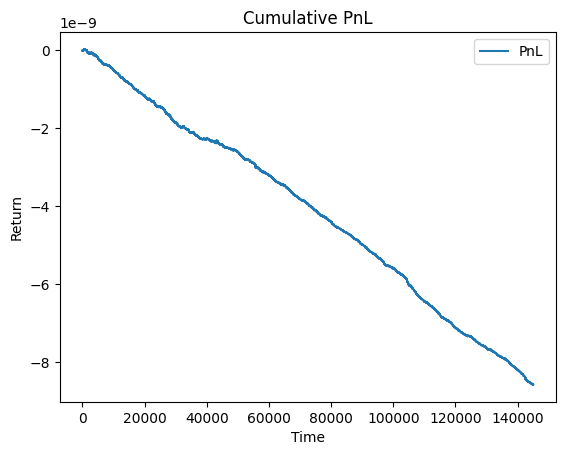

Epoch 70: Loss = 1.6865136785781942e-05
Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.177150e-01
ZION,2.462920e-10
KEY,1.468308e-10
CMA,4.235343e-11
TFC,3.829040e-11
...,...
FOXA,8.898524e-14
WY,8.427436e-14
MO,8.170661e-14
SPGI,7.846563e-14


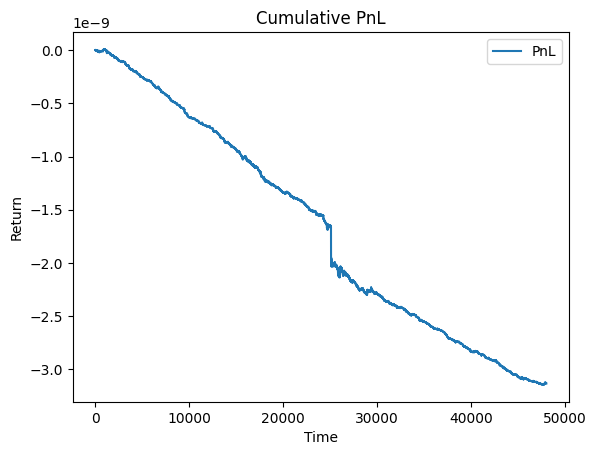

 37%|███▋      | 74/200 [1:01:53<1:44:51, 49.93s/it]

Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.515759e-01
ZION,1.620302e-10
KEY,1.028639e-10
CMA,2.993428e-11
TFC,2.734280e-11
...,...
STZ,5.718147e-14
WY,5.519967e-14
MO,5.205831e-14
SPGI,5.029610e-14


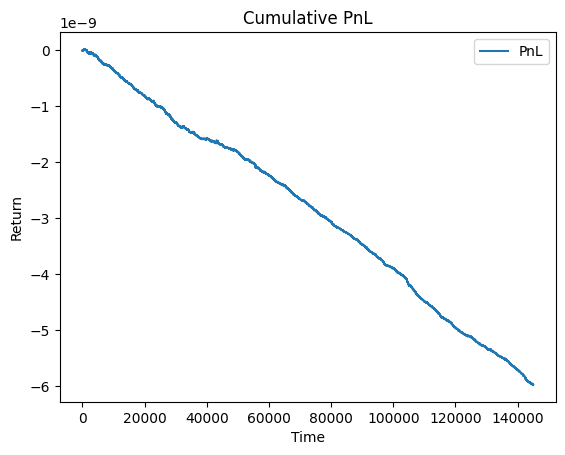

Epoch 75: Loss = 1.1792680197686423e-05
Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.177150e-01
ZION,1.649536e-10
KEY,9.850302e-11
CMA,2.847311e-11
TFC,2.580332e-11
...,...
FOXA,6.317366e-14
WY,5.933766e-14
MO,5.824106e-14
SPGI,5.569689e-14


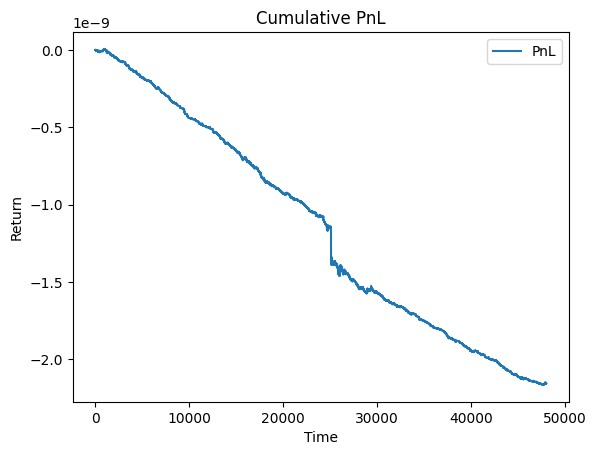

 40%|███▉      | 79/200 [1:06:03<1:40:35, 49.88s/it]

Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.515759e-01
ZION,1.087206e-10
KEY,6.909714e-11
CMA,2.014573e-11
TFC,1.844408e-11
...,...
FOXA,4.067629e-14
WY,3.881569e-14
MO,3.706536e-14
SPGI,3.565952e-14


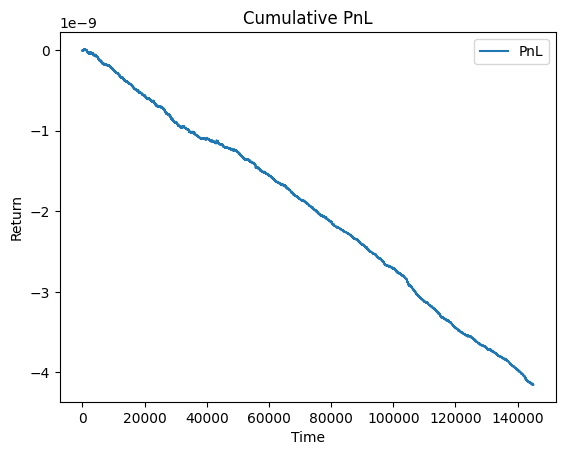

Epoch 80: Loss = 8.24948165245587e-06
Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.177150e-01
ZION,1.106569e-10
KEY,6.614055e-11
CMA,1.915882e-11
TFC,1.739856e-11
...,...
FOXA,4.483130e-14
WY,4.176707e-14
MO,4.149740e-14
SPGI,3.951883e-14


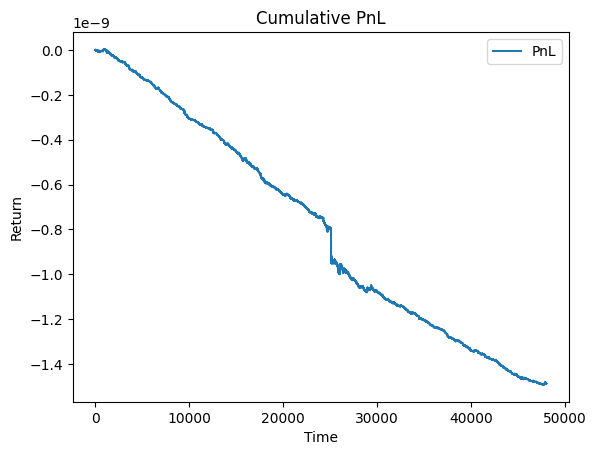

 42%|████▏     | 84/200 [1:10:14<1:37:06, 50.23s/it]

Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.515759e-01
ZION,7.304514e-11
KEY,4.644446e-11
CMA,1.356697e-11
TFC,1.244576e-11
...,...
FOXA,2.882712e-14
WY,2.728210e-14
MO,2.637495e-14
SPGI,2.526787e-14


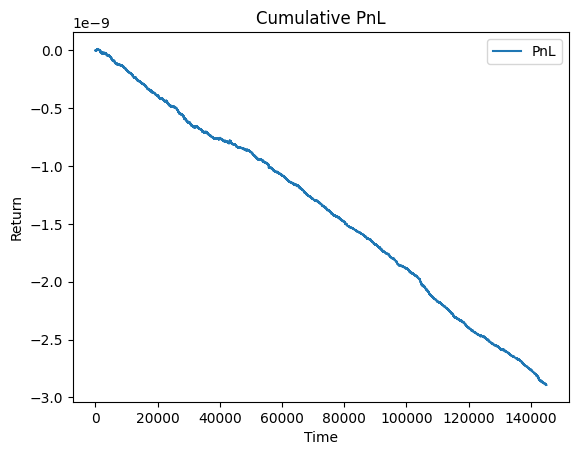

Epoch 85: Loss = 5.7723464124137536e-06
Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.177150e-01
ZION,7.433069e-11
KEY,4.443976e-11
CMA,1.290035e-11
TFC,1.173582e-11
...,...
FOXA,3.179718e-14
MO,2.955037e-14
WY,2.938623e-14
SPGI,2.802434e-14


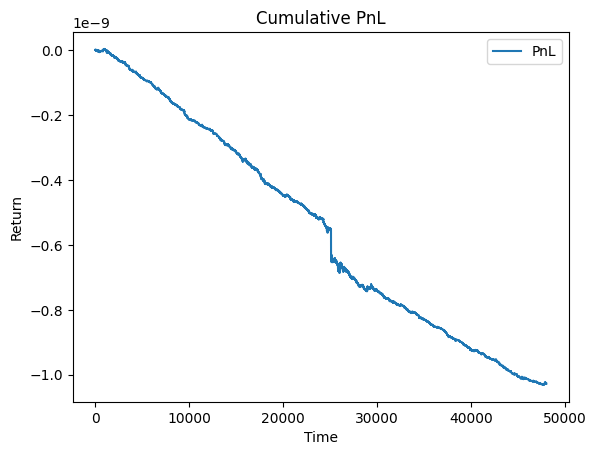

 44%|████▍     | 89/200 [1:14:25<1:32:58, 50.26s/it]

Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.515759e-01
ZION,4.913035e-11
KEY,3.123428e-11
CMA,9.141552e-12
TFC,8.400284e-12
...,...
FOXA,2.041637e-14
WY,1.916535e-14
MO,1.875519e-14
SPGI,1.789275e-14


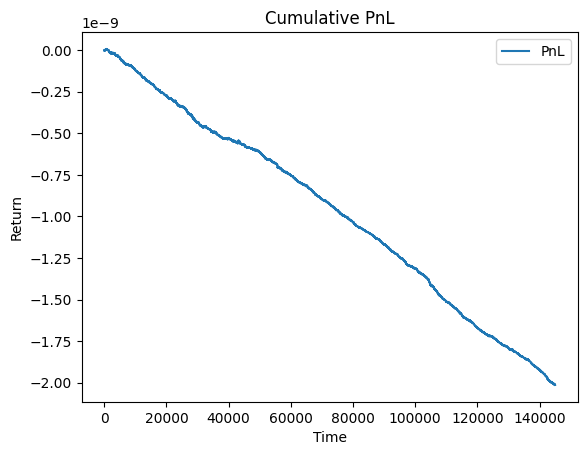

Epoch 90: Loss = 4.039490249851951e-06
Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.177150e-01
ZION,4.998594e-11
KEY,2.987523e-11
CMA,8.691227e-12
TFC,7.918335e-12
...,...
FOXA,2.253812e-14
MO,2.102877e-14
WY,2.066457e-14
SPGI,1.986019e-14


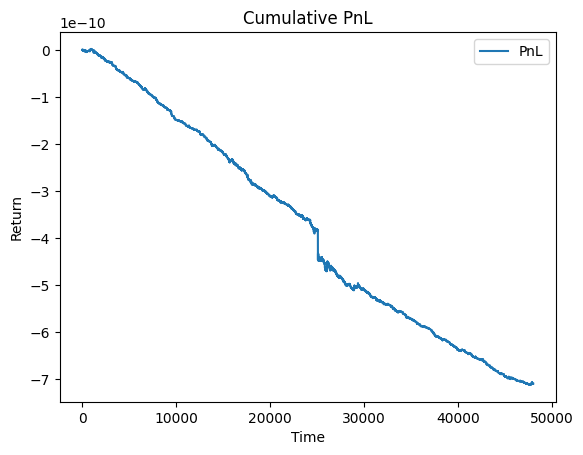

 47%|████▋     | 94/200 [1:18:35<1:28:04, 49.86s/it]

Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.515759e-01
ZION,3.307755e-11
KEY,2.101490e-11
CMA,6.162329e-12
TFC,5.670979e-12
...,...
FOXA,1.444961e-14
WY,1.345585e-14
MO,1.332717e-14
SPGI,1.266149e-14


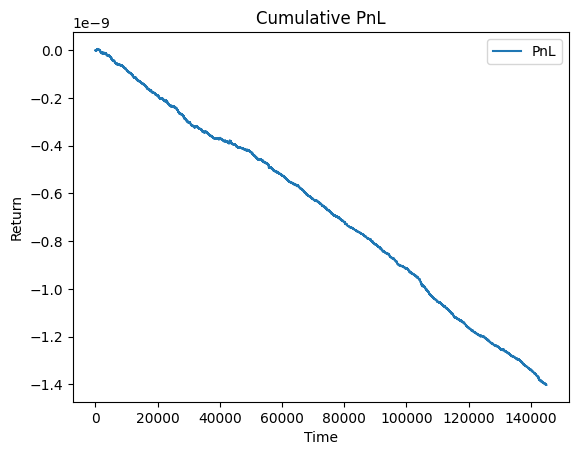

Epoch 95: Loss = 2.8269412268855376e-06
Sharpe Ratio for the epoch: -0.0000
Average Weights:



,Weight
Cash,7.177150e-01
ZION,3.364867e-11
KEY,2.009377e-11
CMA,5.858214e-12
TFC,5.343967e-12
...,...
FOXA,1.596444e-14
MO,1.495402e-14
WY,1.452354e-14
SPGI,1.406497e-14


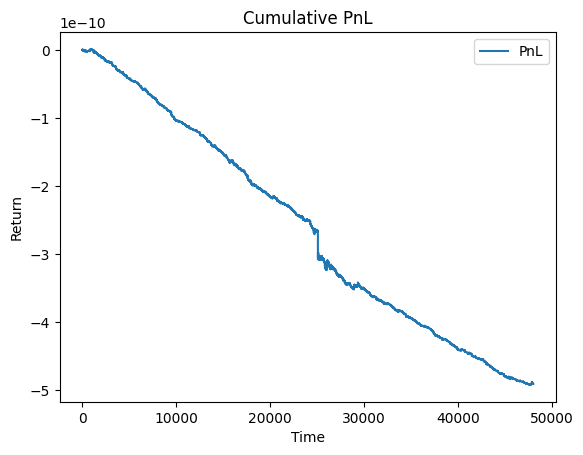

 48%|████▊     | 96/200 [1:20:31<1:27:14, 50.33s/it]


KeyboardInterrupt: 

In [4]:
from copy import deepcopy

loss_fn = StreamingSharpeLoss(
    fee=fee,
    asset_names=pipeline.reader.asset_names + ['Cash'],  # Добавляем Cash в список активов
)

m0 = SimplePortfolioAllocator(
    cmf_dim=cmf_dim + 1,  # +1 for cash_left
    num_assets=num_assets,
).to(device)
m0_path = 'model_iteration_0_epoch_200.pth'
m0.load_state_dict(torch.load(m0_path, map_location=device))
m0.eval()

prev_models = [deepcopy(m0)]  # Start with the first model
for i in range(len(prev_models), 10):

    # ad-hoc so far, mb add this to pipeline
    train_cash_left = []
    for common_feats_old, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('train'):

        # Перевод в тензоры
        common_feats = torch.tensor(common_feats_old.values, dtype=torch.float32).to(device)       # (T, d_common)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

        if len(common_feats) != batch_size:
            continue

        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            common_feats_tmp = common_feats_old.copy()
            common_feats_tmp['cash_left'] = cash_left.detach().numpy()
            common_feats_tmp = torch.tensor(common_feats_tmp.values, dtype=torch.float32).to(device)
            cash_left *= prev_model(common_feats_tmp, asset_feats)[:, -1:]

        train_cash_left.append(cash_left.detach())
    
    test_cash_left = []
    for common_feats_old, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('test'):

        common_feats = torch.tensor(common_feats_old.values, dtype=torch.float32).to(device)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)
        
        if len(common_feats) != batch_size:
            continue

        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            common_feats_tmp = common_feats_old.copy()
            common_feats_tmp['cash_left'] = cash_left.detach().numpy()
            common_feats_tmp = torch.tensor(common_feats_tmp.values, dtype=torch.float32).to(device)
            cash_left *= prev_model(common_feats_tmp, asset_feats)[:, -1:]
        test_cash_left.append(cash_left.detach())

    model = SimplePortfolioAllocator(
        cmf_dim=cmf_dim + 1,
        num_assets=num_assets,
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=adam_lr)

    for epoch in tqdm(range(num_epochs)):
        if epoch in batch_size_config:
            print(f"Changing batch size to {batch_size_config[epoch]} at epoch {epoch}")
            batch_size = batch_size_config[epoch]
            pipeline = FeaturesPipeline(
                path_to_data,
                padding=padding,
                batch_size=batch_size,
                split_dates=split_dates,
                split_names=split_names
            )
        if epoch == 0:
            loss_fn = StreamingSharpeLoss(
                fee=fee,
                asset_names=pipeline.reader.asset_names + ['Cash']
            )

        if epoch == 100:
            loss_fn = StreamingSharpeLoss(
                fee=fee,
                asset_names=pipeline.reader.asset_names + ['Cash'],
                is_sharpe=False
            )

        loss_fn.reset()
        pipeline.reset()
        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('train'), train_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()

            # Перевод в тензоры
            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)       # (T, d_common)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

            if len(common_feats) != batch_size:
                continue

            optimizer.zero_grad()

            # Вычисляем веса
            weights = model(common_feats, asset_feats)

            # Обновляем метрику
            loss_value = loss_fn.forward(
                weights=weights,
                returns=fut_ret,
                prev_model_cash=cash_left,
                min_prices=min_prices,
                market_caps=market_caps
            )
            loss_value.backward()

            optimizer.step()

        if (epoch + 1) % log_freq == 0:
            _, weights_df = loss_fn.plot_whole_epoch_loss()
            weights_df.to_csv(f'weights_iteration_{i}_epoch_{epoch + 1}.csv')
            torch.save(model.state_dict(), f'model_iteration_{i}_epoch_{epoch + 1}.pth')
            print(f"Epoch {epoch + 1}: Loss = {loss_value.item()}")
        loss_fn.reset()

        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('test'), test_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()

            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)

            if len(common_feats) !=  batch_size:
                continue

            weights = model(common_feats, asset_feats)
            loss_fn.forward(weights=weights, returns=fut_ret, prev_model_cash=cash_left, min_prices=min_prices, market_caps=market_caps)

        if (epoch + 1) % log_freq == 0:
            loss_fn.plot_whole_epoch_loss()
        loss_fn.reset()

    prev_models.append(deepcopy(model))
    print(f"Iteration {i + 1} completed.")

As seen - we collapse to buy and hold (both with sharpe-pnl and pnl).